In [1]:
!pip install matplotlib matplotlib-venn
!pip install wordcloud
!wget https://huggingface.co/google-bert/bert-base-cased/raw/main/vocab.txt

import json

import matplotlib.pyplot as plt
import nltk
import pandas as pd
from matplotlib_venn import venn2
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

--2025-05-16 13:42:21--  https://huggingface.co/google-bert/bert-base-cased/raw/main/vocab.txt
Resolving huggingface.co (huggingface.co)... 18.164.174.118, 18.164.174.23, 18.164.174.55, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213450 (208K) [text/plain]
Saving to: ‘vocab.txt.6’

vocab.txt.6         100%[===================>] 208.45K  --.-KB/s    in 0.08s   

2025-05-16 13:42:22 (2.55 MB/s) - ‘vocab.txt.6’ saved [213450/213450]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# load our vocab
vocab = set(json.load(open("/content/tokenizer.json"))['model']['vocab'])

# load bert-base-cased vocab
bert_vocab = set(open("/content/vocab.txt").read().split("\n"))

In [3]:
vocab = set([w for w in vocab if w.isalpha()])
bert_vocab = set([w for w in bert_vocab if w.isalpha()])

In [4]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)


vocab = set([word for word in vocab if word.lower() not in stopwords.words('english')])
bert_vocab = set([word for word in bert_vocab if word.lower() not in stopwords.words('english')])

In [5]:
overlap = vocab.intersection(bert_vocab)
print(pd.DataFrame(list(overlap)[:30]))

print(f"\nOverlap: {round(len(overlap) / len(vocab) * 100, 2)}%")

              0
0         lever
1    proprietor
2     catchment
3    developers
4        donate
5     direction
6        tongue
7   descendants
8       flowers
9        recall
10       shorts
11     planting
12   management
13     disposal
14   projecting
15      comment
16          use
17    munitions
18   whatsoever
19        elder
20         save
21        fires
22     paradise
23     assessed
24    injustice
25      possess
26    transform
27      booking
28          hum
29    functions

Overlap: 41.32%


In [6]:
roosebert = list(vocab - bert_vocab)
bert = list(bert_vocab - vocab)

min_value = min(len(roosebert), len(bert))

In [7]:
pd.DataFrame({"bert_vocab": bert[:min_value], "roosebert_vocab": roosebert[:min_value]}).head(15)

,bert_vocab,roosebert_vocab
0,Moody,becken
1,symmetrical,maith
2,Angelo,impoverished
3,Matilda,barristers
4,defunct,dictators
5,blankets,covenants
6,Philosophy,haase
7,ì,stig
8,UFO,holland
9,elbows,exaggeration


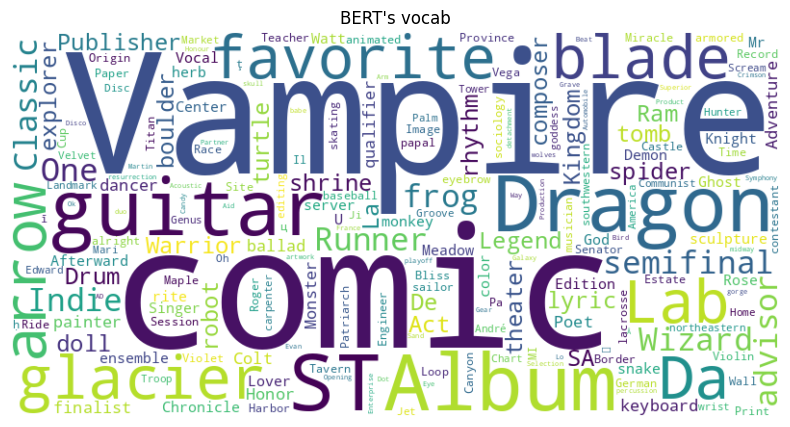

In [8]:
text = " ".join(list(bert))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("BERT's vocab")
plt.show()

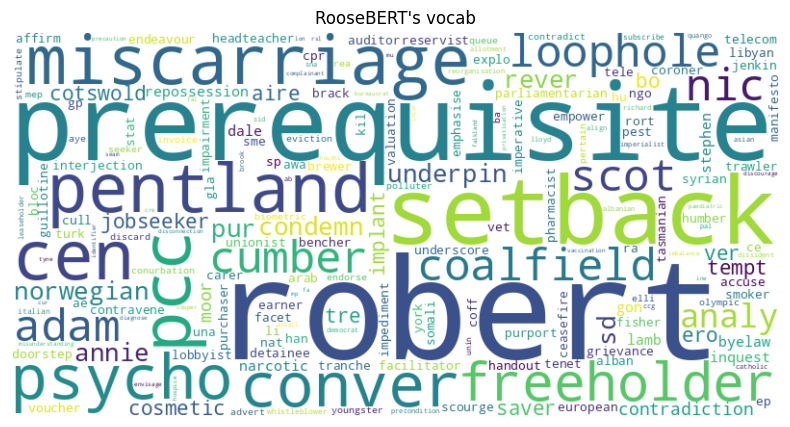

In [9]:
text = " ".join(list(roosebert))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("RooseBERT's vocab")
plt.show()

In [10]:
intersection = vocab & bert_vocab
union = vocab | bert_vocab
unique_to_vocab = vocab - bert_vocab
unique_to_bert = bert_vocab - vocab

# Jaccard similarity and dissimilarity
jaccard_similarity = len(intersection) / len(union)
jaccard_dissimilarity = 1 - jaccard_similarity

# Reporting
print("==== Vocabulary Comparison ====")
print(f"RooseBERT vocab size: {len(vocab)}")
print(f"BERT vocab size: {len(bert_vocab)}")
print(f"Shared tokens: {len(intersection)}")
print(f"Unique to RooseBERT: {len(unique_to_vocab)}")
print(f"Unique to BERT: {len(unique_to_bert)}")
print(f"Jaccard similarity: {jaccard_similarity:.4f}")
print(f"Jaccard dissimilarity: {jaccard_dissimilarity:.4f}")

==== Vocabulary Comparison ====
RooseBERT vocab size: 24100
BERT vocab size: 21140
Shared tokens: 9958
Unique to RooseBERT: 14142
Unique to BERT: 11182
Jaccard similarity: 0.2822
Jaccard dissimilarity: 0.7178


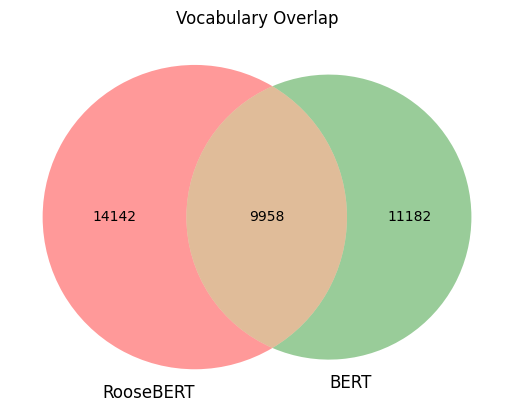

In [12]:
def plot_vocab_venn(vocab_a, vocab_b, label_a="RooseBERT", label_b="BERT"):
    set_a = set(vocab_a)
    set_b = set(vocab_b)

    shared = set_a & set_b
    only_a = set_a - set_b
    only_b = set_b - set_a

    venn2(subsets=(len(only_a), len(only_b), len(shared)),
          set_labels=(label_a, label_b))
    plt.title("Vocabulary Overlap")
    plt.show()


plot_vocab_venn(vocab, bert_vocab)